(1427, 2100, 3)


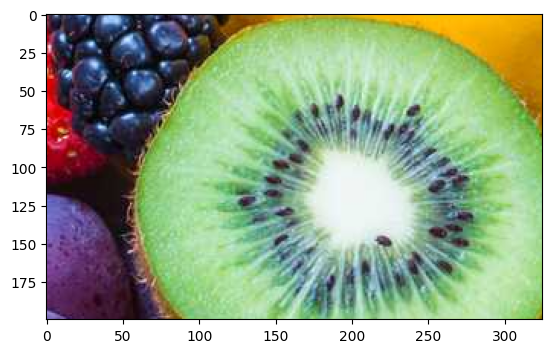

In [12]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh từ file
data = iio.imread('fruit.jpg')

# Cắt ảnh: từ dòng 800 đến 1200, cột 570 đến 980
bmg = data[500:700, 175:500]

# In ra kích thước ảnh gốc
print(data.shape)

# Lưu vùng ảnh đã cắt thành file mới
iio.imwrite('kiwi.jpg', bmg)

# Hiển thị ảnh đã cắt
plt.imshow(bmg)
plt.show()


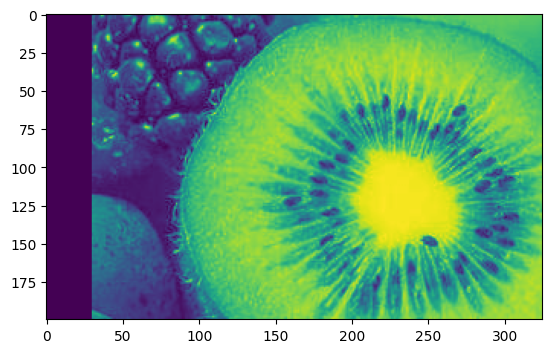

In [17]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh 'fruit.jpg' dưới dạng ảnh xám
du_lieu = iio.imread('kiwi.jpg', mode='F')

# Dịch chuyển ảnh sang phải 25 pixel và xuống dưới 100 pixel
anh_dich_chuyen = nd.shift(du_lieu, (0, 30))

# Hiển thị ảnh đã dịch chuyển
plt.imshow(anh_dich_chuyen,)
plt.show()

(1414, 2119)


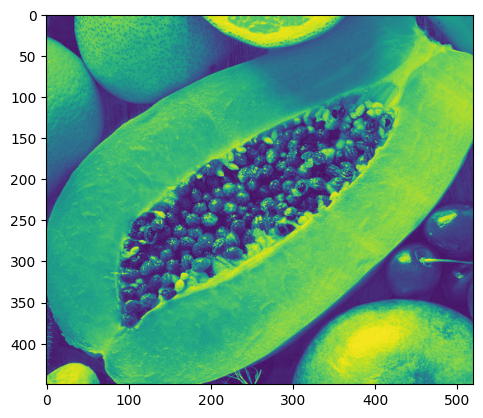

In [28]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh từ file
data = iio.imread('colorful-ripe-tropical-fruits.jpg', mode='F')

# Cắt ảnh: từ dòng 800 đến 1200, cột 570 đến 980
bmg = data[350:800, 130:650]

# In ra kích thước ảnh gốc
print(data.shape)

# Chuyển đổi ảnh sang kiểu uint8 trước khi lưu
bmg_uint8 = np.clip(bmg, 0, 255).astype(np.uint8)
iio.imwrite('dudu.jpg', bmg_uint8)

# Hiển thị ảnh đã cắt
plt.imshow(bmg)
plt.show()


(1414, 2119)


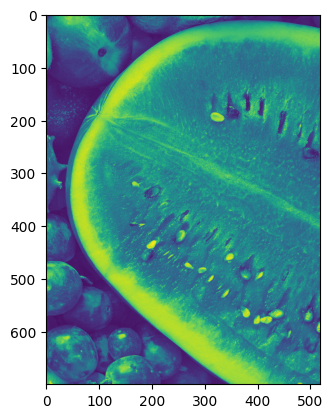

In [26]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh từ file
data = iio.imread('colorful-ripe-tropical-fruits.jpg', mode='F')

# Cắt ảnh: từ dòng 800 đến 1200, cột 570 đến 980
bmg = data[300:1000, 1600:2500]

# In ra kích thước ảnh gốc
print(data.shape)

# Chuyển đổi ảnh sang kiểu uint8 trước khi lưu
bmg_uint8 = np.clip(bmg, 0, 255).astype(np.uint8)
iio.imwrite('duahau.jpg', bmg_uint8)

# Hiển thị ảnh đã cắt
plt.imshow(bmg)
plt.show()


(605, 1021, 3)


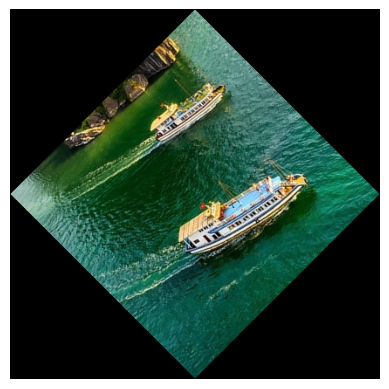

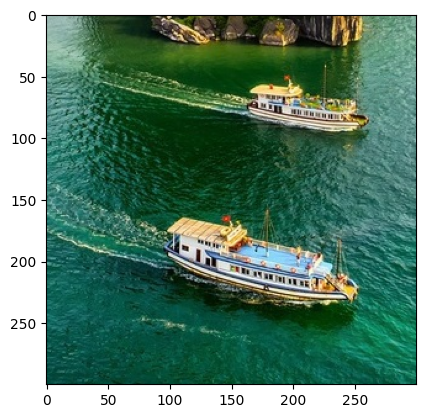

In [15]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd


# Đọc ảnh từ file sử dụng biến image_path đã có sẵn
data = iio.imread('quang_ninh.jpg')


# Cắt ảnh: từ dòng 100 đến 500, cột 100 đến 500 (đảm bảo nằm trong kích thước ảnh)
bmg = data[300:600, 400:700]


print(data.shape)

# Chuyển đổi ảnh sang kiểu uint8 trước khi lưu
bmg_uint8 = np.clip(bmg, 0, 255).astype(np.uint8)
iio.imwrite('thuyen.jpg', bmg_uint8)
rotated = nd.rotate(bmg, 45)

# Chuyển đổi ảnh sang kiểu uint8 trước khi lưu
rotated_uint8 = np.clip(rotated, 0, 255).astype(np.uint8)
iio.imwrite('thuyen_xoay_40.jpg', rotated_uint8)

# Hiển thị ảnh đã xoay
plt.imshow(rotated)
plt.axis('off')
plt.show()

# Hiển thị ảnh đã cắt
plt.imshow(bmg)

plt.show()


Các ảnh có trong thư mục exercise:
1. colorful-ripe-tropical-fruits.jpg
2. fruit.jpg
3. ha-long-bay-in-vietnam.jpg
4. pagoda.jpg
5. quang_ninh.jpg
6. world_cup.jpg

Menu:
T - Tịnh tiến
X - Xoay
P - Phóng to
H - Thu nhỏ
C - Coordinate Map


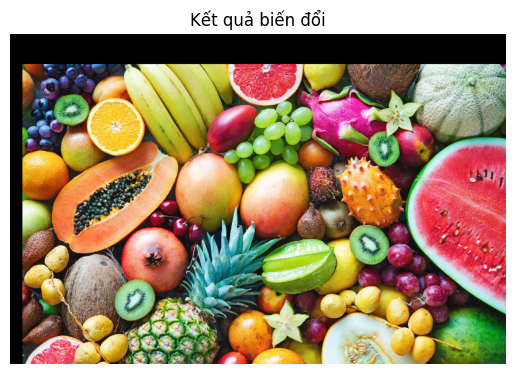

In [2]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import cv2
import os

def resize_if_large(img, max_size=800):
    h, w = img.shape[:2]
    if max(h, w) > max_size:
        scale = max_size / max(h, w)
        img = cv2.resize(img, (int(w*scale), int(h*scale)))
    return img

def translate(img):
    dx = int(input("Nhập số pixel dịch chuyển theo trục X: "))
    dy = int(input("Nhập số pixel dịch chuyển theo trục Y: "))
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    h, w = img.shape[:2]
    return cv2.warpAffine(img, M, (w, h))

def rotate(img):
    angle = float(input("Nhập góc xoay (độ): "))
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, M, (w, h))

def zoom_in(img):
    factor = float(input("Nhập hệ số phóng to (>1): "))
    h, w = img.shape[:2]
    return cv2.resize(img, (int(w*factor), int(h*factor)))

def zoom_out(img):
    factor = float(input("Nhập hệ số thu nhỏ (<1): "))
    h, w = img.shape[:2]
    return cv2.resize(img, (int(w*factor), int(h*factor)))

def coordinate_map(img):
    # Sử dụng scipy cho phép biến đổi này vì OpenCV không hỗ trợ trực tiếp
    import scipy.ndimage as nd
    def GeoFun(outcoord):
        a = 10 * np.cos(outcoord[0] / 10.0) + outcoord[0]
        b = 10 * np.cos(outcoord[1] / 10.0) + outcoord[1]
        return a, b
    if img.ndim == 3:
        # Xử lý từng kênh màu
        channels = [nd.geometric_transform(img[...,i], GeoFun) for i in range(3)]
        return np.stack(channels, axis=-1)
    else:
        return nd.geometric_transform(img, GeoFun)

# Đọc danh sách file ảnh trong thư mục exercise
folder = 'exercise'
files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

if not files:
    print("Không tìm thấy ảnh trong thư mục exercise.")
    exit()

print("Các ảnh có trong thư mục exercise:")
for idx, f in enumerate(files):
    print(f"{idx+1}. {f}")

img_idx = int(input("Chọn số thứ tự ảnh muốn thao tác: ")) - 1
img_path = os.path.join(folder, files[img_idx])
img = iio.imread(img_path)
img = resize_if_large(img)

print("\nMenu:")
print("T - Tịnh tiến")
print("X - Xoay")
print("P - Phóng to")
print("H - Thu nhỏ")
print("C - Coordinate Map")

choice = input("Chọn phép biến đổi (T/X/P/H/C): ").upper()

if choice == 'T':
    result = translate(img)
elif choice == 'X':
    result = rotate(img)
elif choice == 'P':
    result = zoom_in(img)
elif choice == 'H':
    result = zoom_out(img)
elif choice == 'C':
    result = coordinate_map(img)
else:
    print("Lựa chọn không hợp lệ!")
    exit()

plt.imshow(result if result.ndim == 3 else result, cmap='gray' if result.ndim == 2 else None)
plt.axis('off')
plt.title("Kết quả biến đổi")
plt.show()